### Load libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
%matplotlib inline

### Load dataset and check data type of each column

In [2]:
dataset = pd.read_csv("forbes global 2022(2000 companies) - companies.csv")
dataset.head()

,rank,global company,country,sales,profit,assets,market value
0,1,Berkshire Hathaway,United States,$276.09 B,$89.8 B,$958.78 B,$741.48 B
1,2,ICBC,China,$208.13 B,$54.03 B,"$5,518.51 B",$214.43 B
2,3,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,$400.38 B,$105.36 B,$576.04 B,"$2,292.08 B"
3,4,JPMorgan Chase,United States,$124.54 B,$42.12 B,"$3,954.69 B",$374.45 B
4,5,China Construction Bank,China,$202.07 B,$46.89 B,"$4,746.95 B",$181.32 B


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   rank            2000 non-null   int64 
 1   global company  2000 non-null   object
 2   country         2000 non-null   object
 3   sales           2000 non-null   object
 4   profit          2000 non-null   object
 5   assets          2000 non-null   object
 6   market value    2000 non-null   object
dtypes: int64(1), object(6)
memory usage: 109.5+ KB


### Check null in dataset

In [4]:
dataset.isnull().sum()

rank              0
global company    0
country           0
sales             0
profit            0
assets            0
market value      0
dtype: int64

### Write a function that change string floating number to normal floating number

In [5]:
def get_float(x:str) -> float:
    return float("".join(x.split(" ")[0][1:].split(",")))

col_change_to_flt = ["sales ", "profit ", "assets", "market value"]
for col in col_change_to_flt:
    dataset[col] = dataset[col].apply(get_float)

In [6]:
dataset.head()

,rank,global company,country,sales,profit,assets,market value
0,1,Berkshire Hathaway,United States,276.09,89.80,958.78,741.48
1,2,ICBC,China,208.13,54.03,5518.51,214.43
2,3,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,400.38,105.36,576.04,2292.08
3,4,JPMorgan Chase,United States,124.54,42.12,3954.69,374.45
4,5,China Construction Bank,China,202.07,46.89,4746.95,181.32


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   rank            2000 non-null   int64  
 1   global company  2000 non-null   object 
 2   country         2000 non-null   object 
 3   sales           2000 non-null   float64
 4   profit          2000 non-null   float64
 5   assets          2000 non-null   float64
 6   market value    2000 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 109.5+ KB


### Univariate Analysis

In [8]:
len(dataset["global company"].unique())

2000

In [9]:
dataset["country"].unique()

array(['United States', 'China', 'Saudi Arabia', 'Japan', 'South Korea',
       'United Kingdom', 'Germany', 'France', 'Hong Kong', 'Switzerland',
       'Canada', 'Russia', 'India', 'Taiwan', 'Spain', 'Brazil', 'Norway',
       'Australia', 'Netherlands', 'Belgium', 'Italy', 'Denmark',
       'Ireland', 'Mexico', 'Luxembourg', 'Singapore', 'Thailand',
       'Qatar', 'Finland', 'Sweden', 'Colombia', 'United Arab Emirates',
       'Indonesia', 'Austria', 'Bermuda', 'South Africa', 'Malaysia',
       'Turkey', 'Portugal', 'Israel', 'Kuwait', 'Poland', 'Chile',
       'Czech Republic', 'Vietnam', 'Hungary', 'Philippines', 'Peru',
       'Greece', 'Uruguay', 'Morocco', 'Bahrain', 'Cayman Islands',
       'Kazakhstan', 'Argentina', 'Egypt', 'Nigeria'], dtype=object)

In [10]:
len(dataset["country"].unique())

57

In [11]:
dataset["country"].value_counts()

United States           590
China                   297
Japan                   196
South Korea              65
United Kingdom           64
Canada                   58
India                    55
France                   54
Hong Kong                54
Germany                  52
Taiwan                   48
Switzerland              40
Sweden                   32
Australia                30
Italy                    26
Netherlands              24
Russia                   24
Brazil                   23
Ireland                  21
Spain                    21
Saudi Arabia             16
Thailand                 14
Israel                   13
South Africa             13
United Arab Emirates     13
Denmark                  11
Singapore                11
Turkey                    9
Austria                   9
Finland                   9
Luxembourg                9
Mexico                    9
Poland                    8
Norway                    8
Indonesia                 7
Malaysia            

In [12]:
len(dataset["rank "].unique())

1675

#### we can know some of the company have the same rank

In [13]:
def univariate_plot(x: pd.Series, title: str) -> None:
    plt.figure(figsize = (28, 12))
    sns.histplot(x, kde = True)
    plt.title(title)
    plt.ylabel("Billion")
    plt.show()
    print(x.describe())

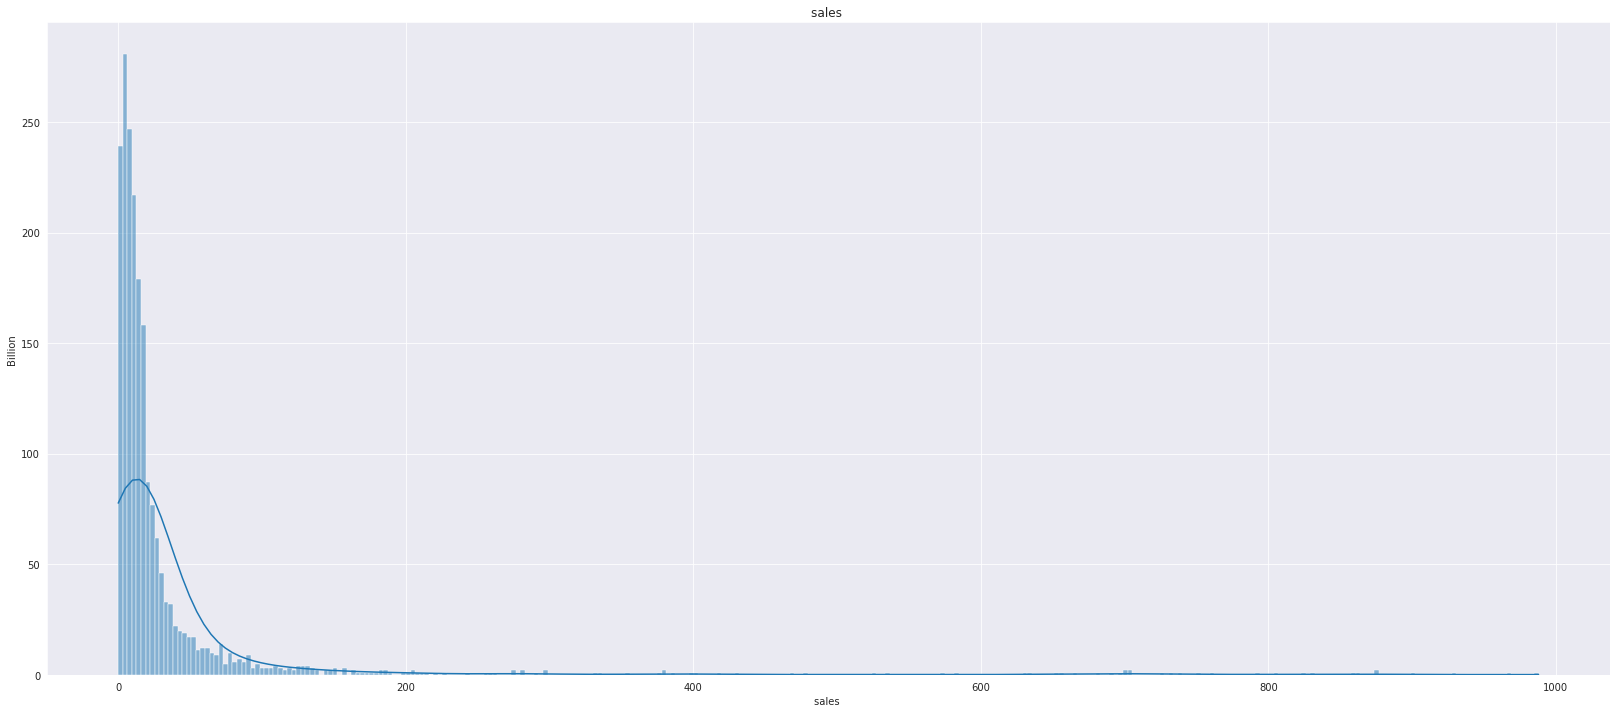

count    2000.000000
mean       38.191705
std       103.684420
min         0.000000
25%         6.130000
50%        12.940000
75%        26.147500
max       988.000000
Name: sales , dtype: float64


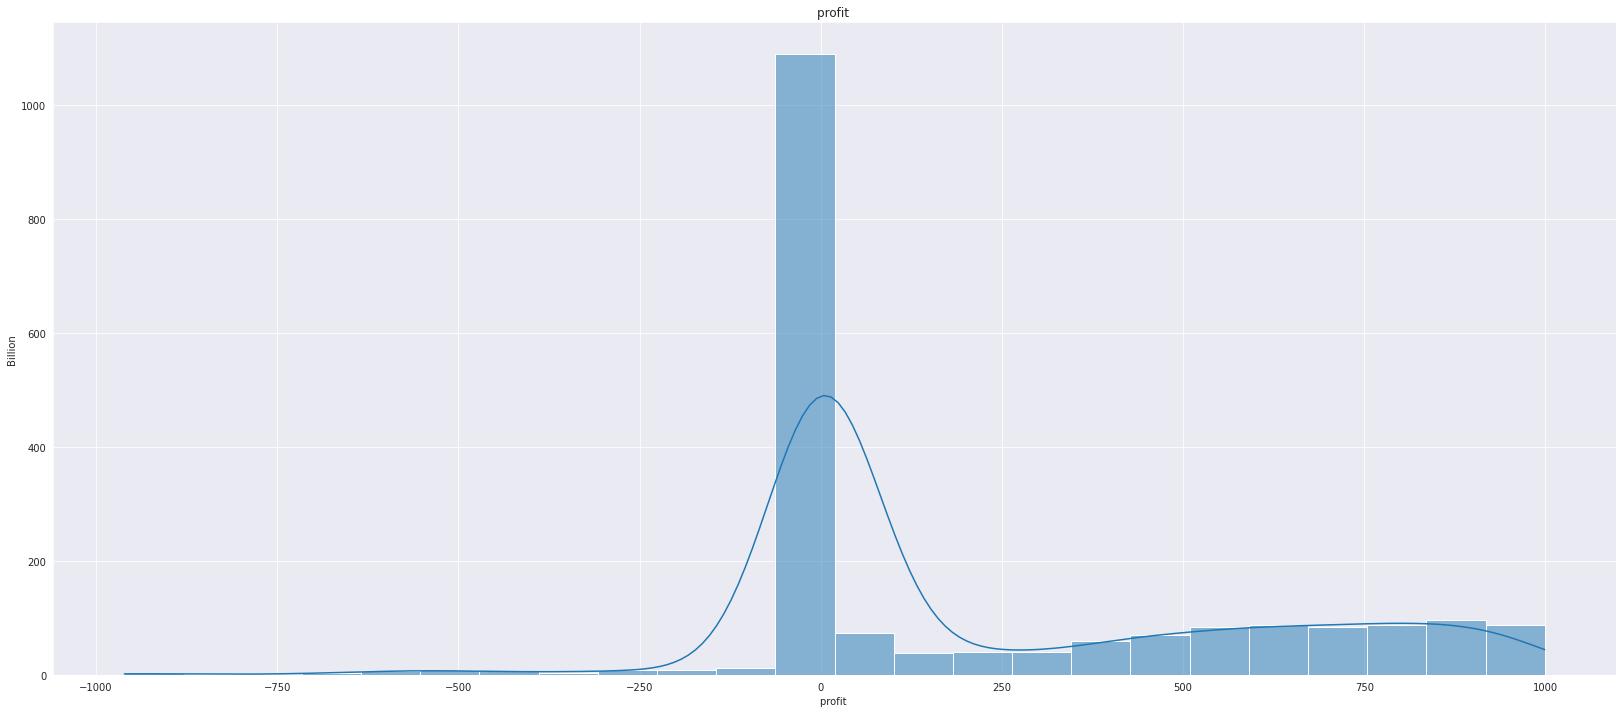

count    2000.000000
mean      232.508720
std       353.191423
min      -961.000000
25%         1.677500
50%         5.970000
75%       537.500000
max       999.100000
Name: profit , dtype: float64


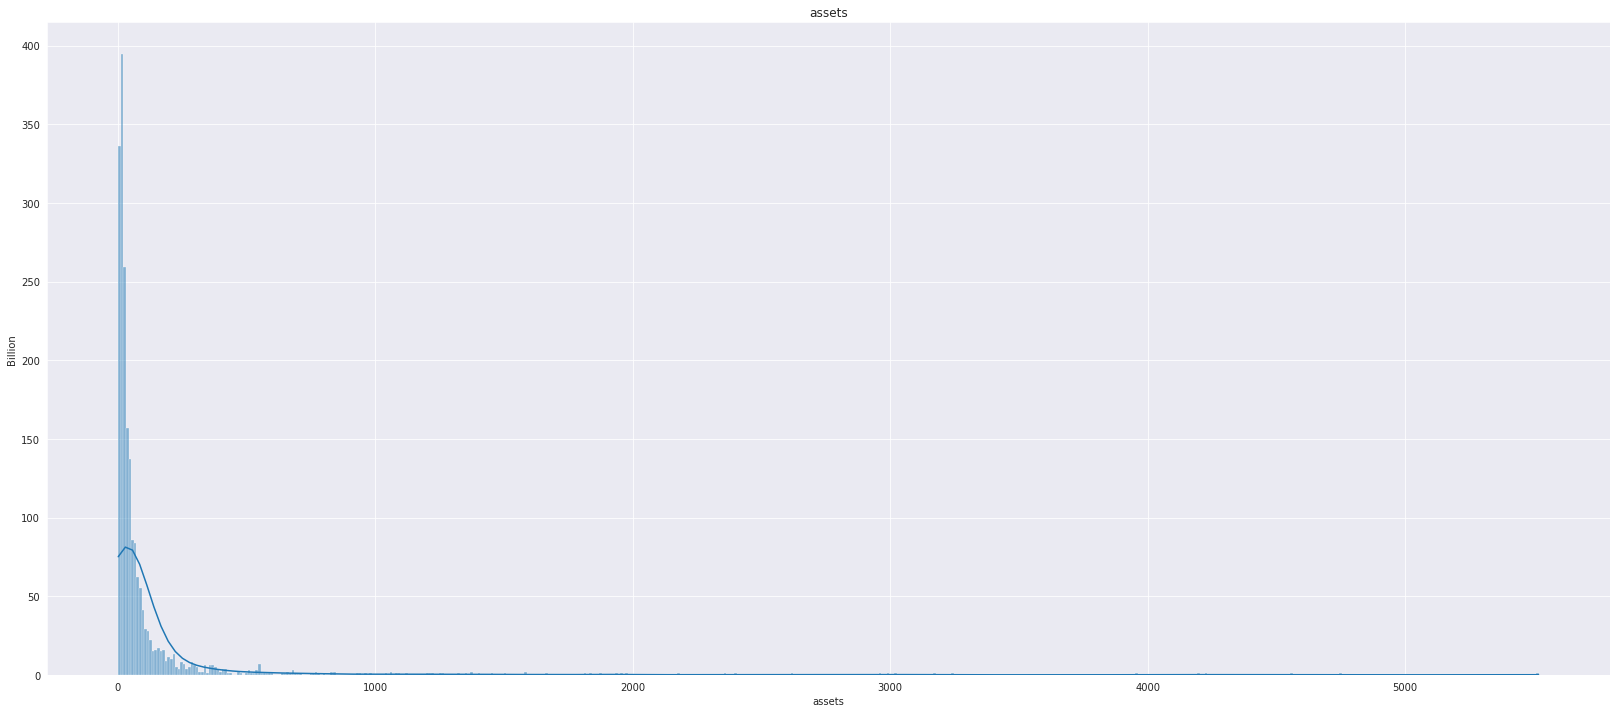

count    2000.000000
mean      117.467445
std       363.822280
min         1.360000
25%        14.937500
50%        32.245000
75%        78.290000
max      5518.510000
Name: assets, dtype: float64


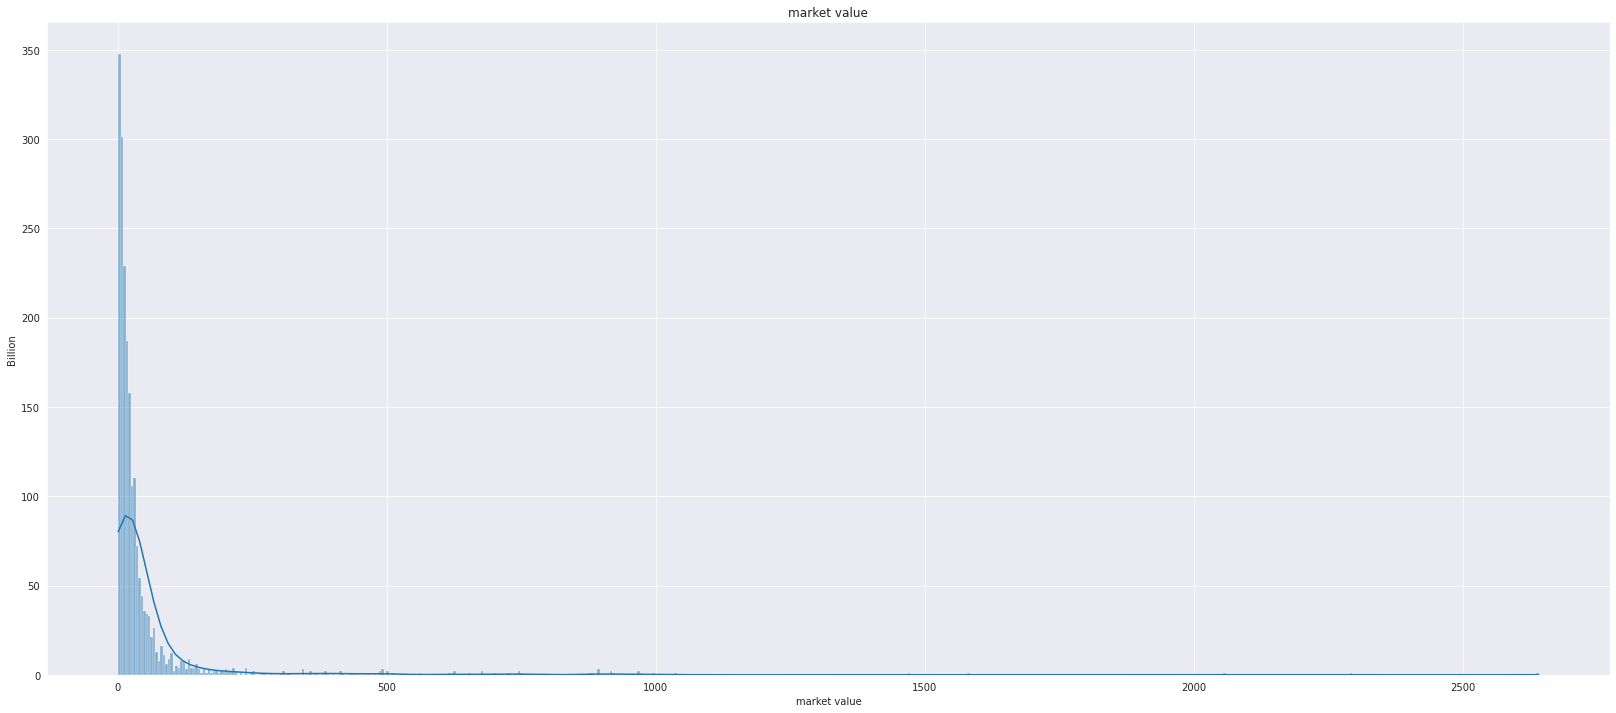

count    2000.000000
mean       51.875460
std       149.803839
min         1.040000
25%         7.967500
50%        17.915000
75%        37.037500
max      2640.320000
Name: market value, dtype: float64


In [14]:
cols = ["sales ", "profit ", "assets", "market value"]
for col in cols:
    univariate_plot(dataset[col], col)

#### Most company have 0 profits

### Bivariate Analysis

In [15]:
def bivariate_plot(col: pd.Series) -> None:
    plt.figure(figsize = (28, 12))
    sns.scatterplot(data = dataset, x = "rank ", y = col)
    plt.title(f"rank vs {col}")
    plt.ylabel(f"{col}")
    plt.show()

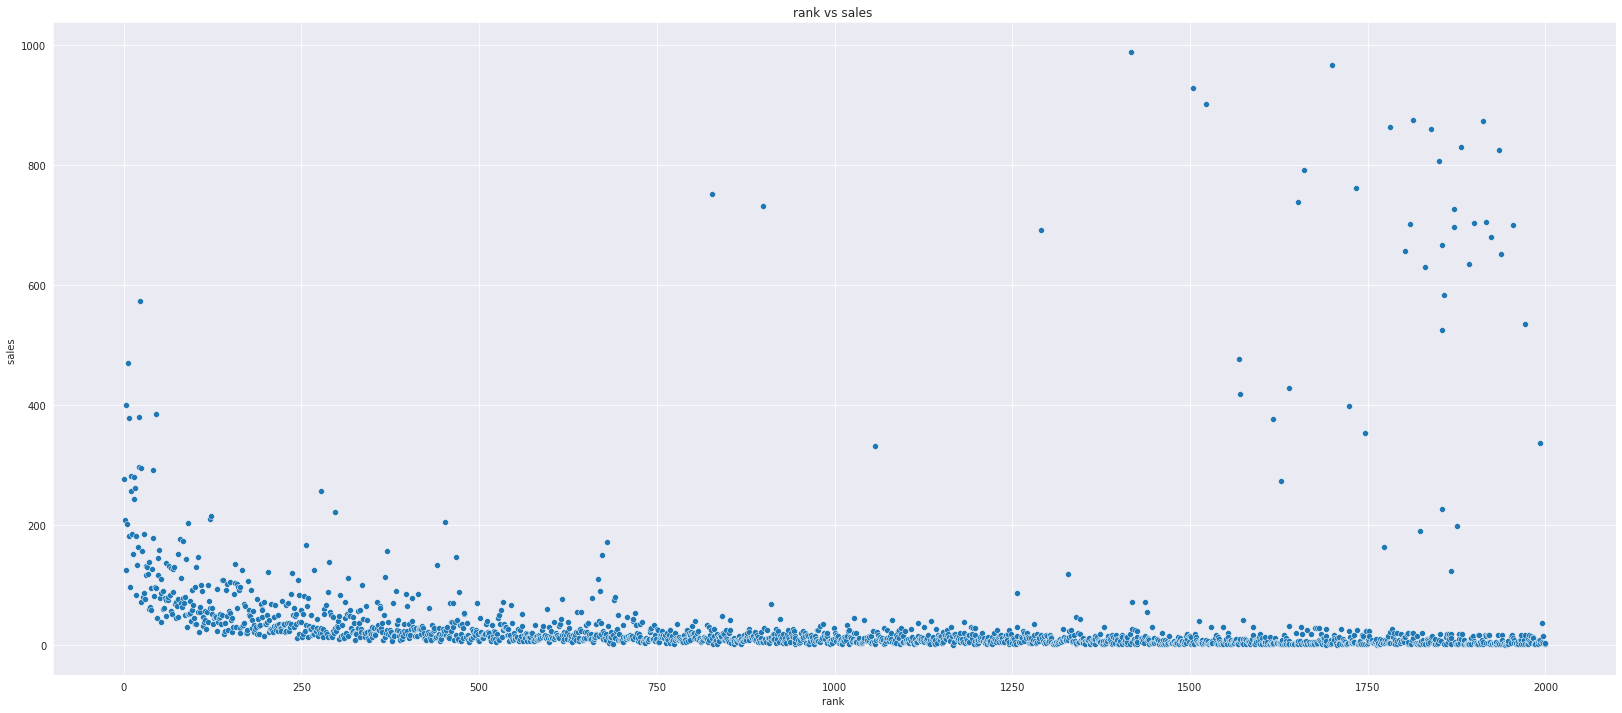

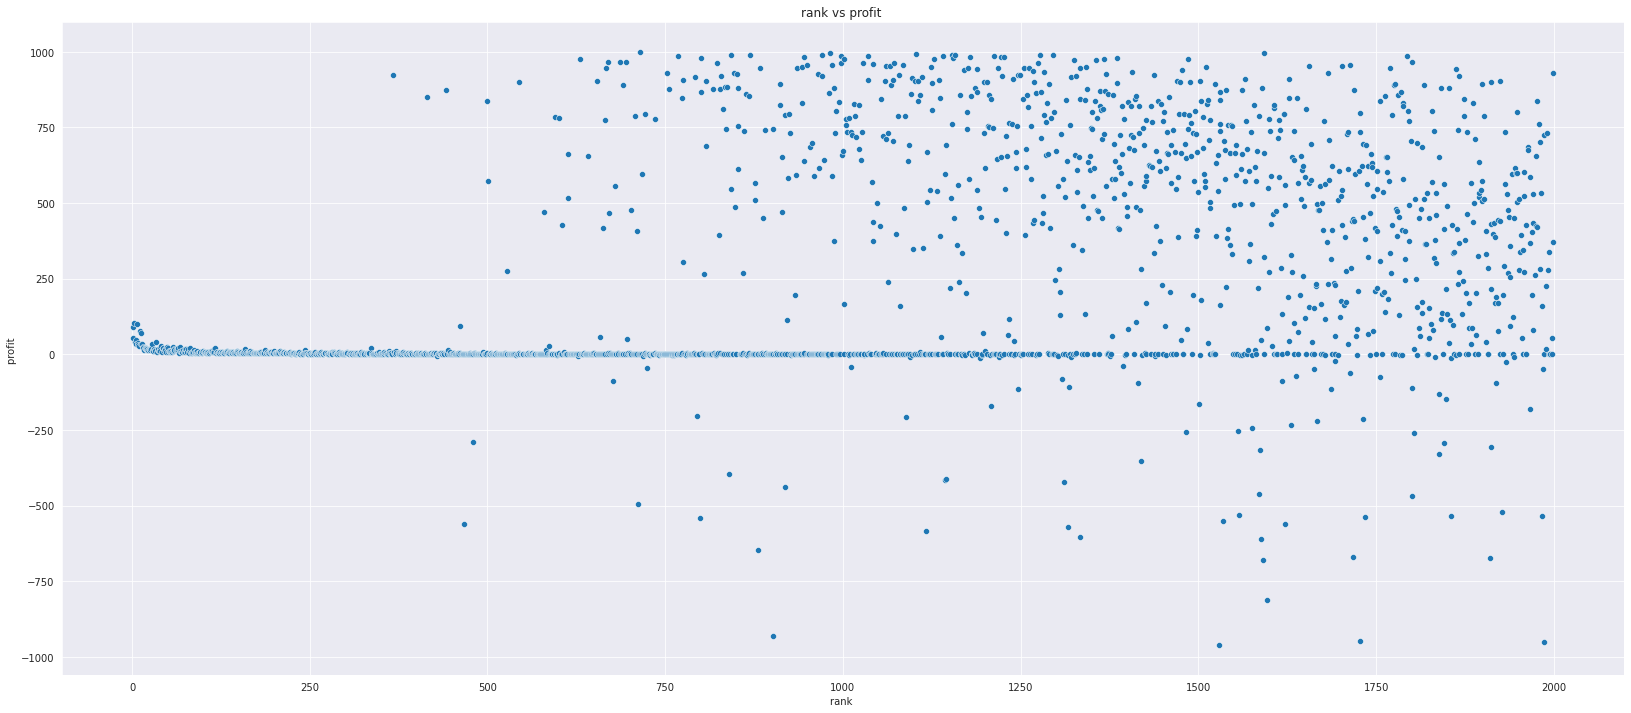

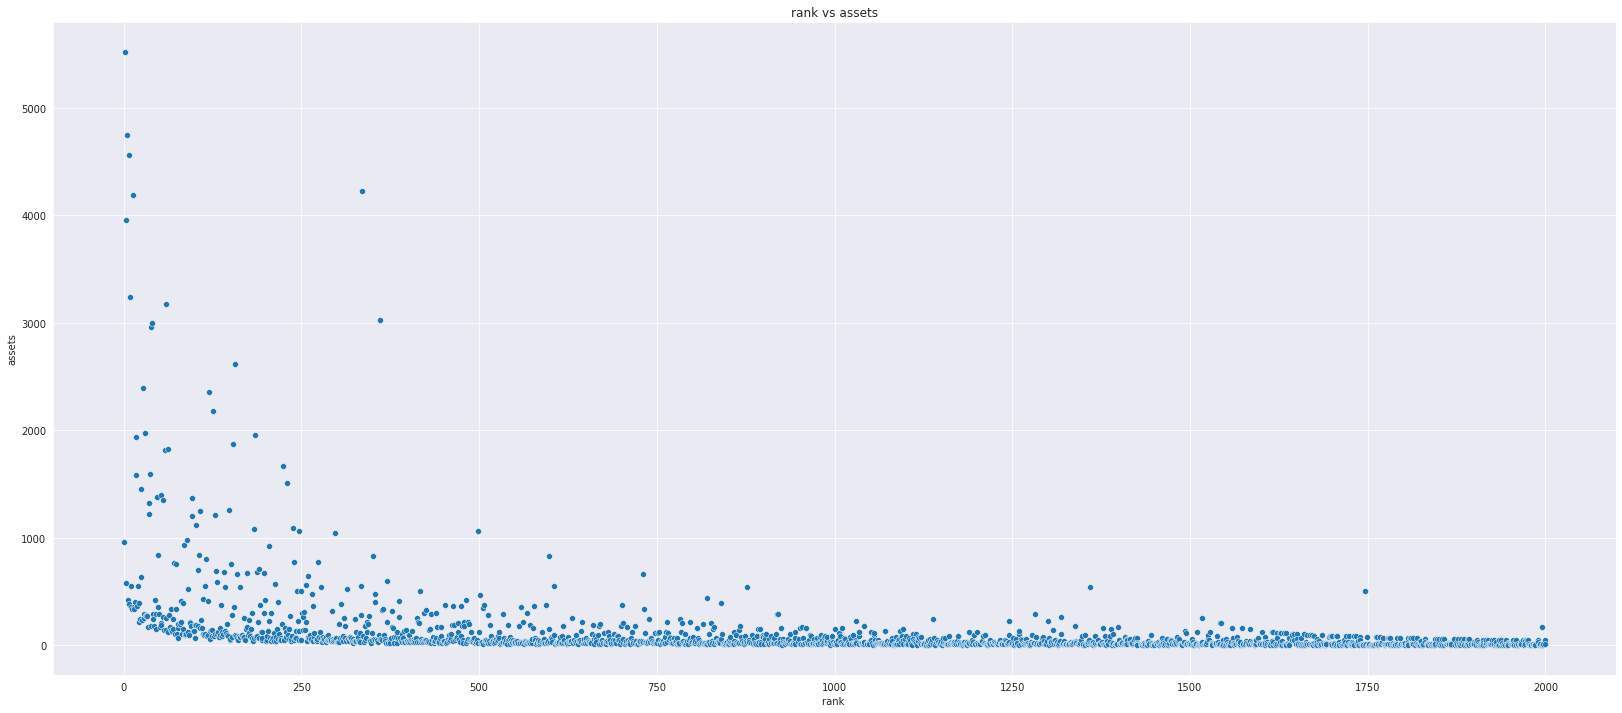

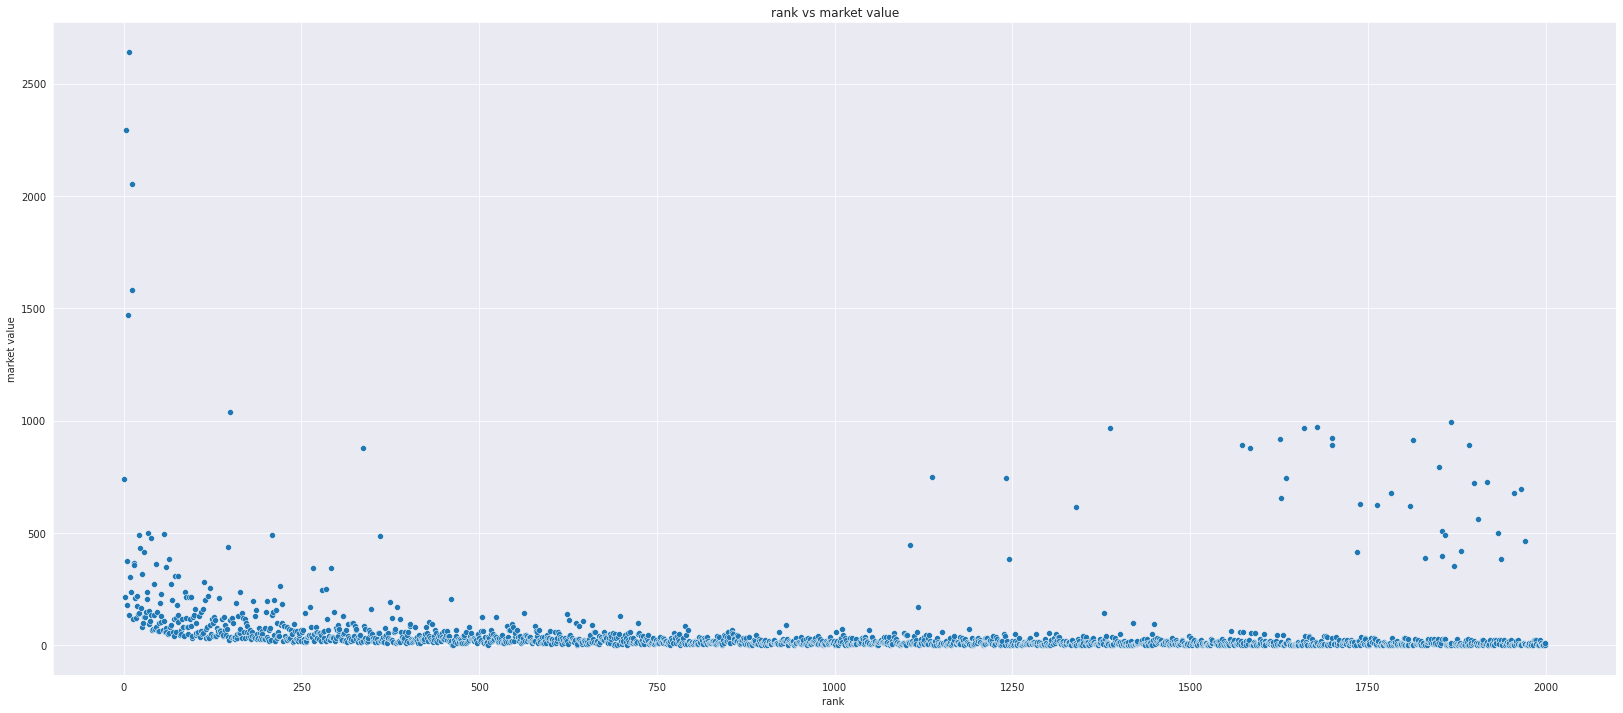

In [16]:
for col in cols:
    bivariate_plot(col)

### We can see that sales, assets, and market shares of each company follow the exponentail distribution when arrange by their rank

In [17]:
for col in cols:
    print(col)
    data = dataset.groupby("country")[col].agg("mean").sort_values(ascending = False)
    print("Top 5")
    print(data.head())
    print("Last 5")
    print(data.tail())
    print()

sales 
Top 5
country
Luxembourg    102.884444
Sweden         85.555312
Greece         81.596000
Japan          75.981224
Israel         60.733077
Name: sales , dtype: float64
Last 5
country
Nigeria           3.38
Egypt             3.23
Kazakhstan        2.56
Bahrain           1.56
Cayman Islands    1.40
Name: sales , dtype: float64

profit 
Top 5
country
Peru       915.70
Nigeria    880.70
Egypt      847.10
Bahrain    567.50
Vietnam    563.84
Name: profit , dtype: float64
Last 5
country
Argentina           2.700000
Bermuda             1.793333
Hungary             1.615000
Kazakhstan          1.045000
Cayman Islands   -165.000000
Name: profit , dtype: float64

assets
Top 5
country
United Kingdom    224.600781
Spain             218.993810
France            212.116481
Italy             192.295000
China             175.208249
Name: assets, dtype: float64
Last 5
country
Argentina         23.270
Cayman Islands    19.860
Kazakhstan        18.055
Uruguay           10.100
Nigeria            5.7

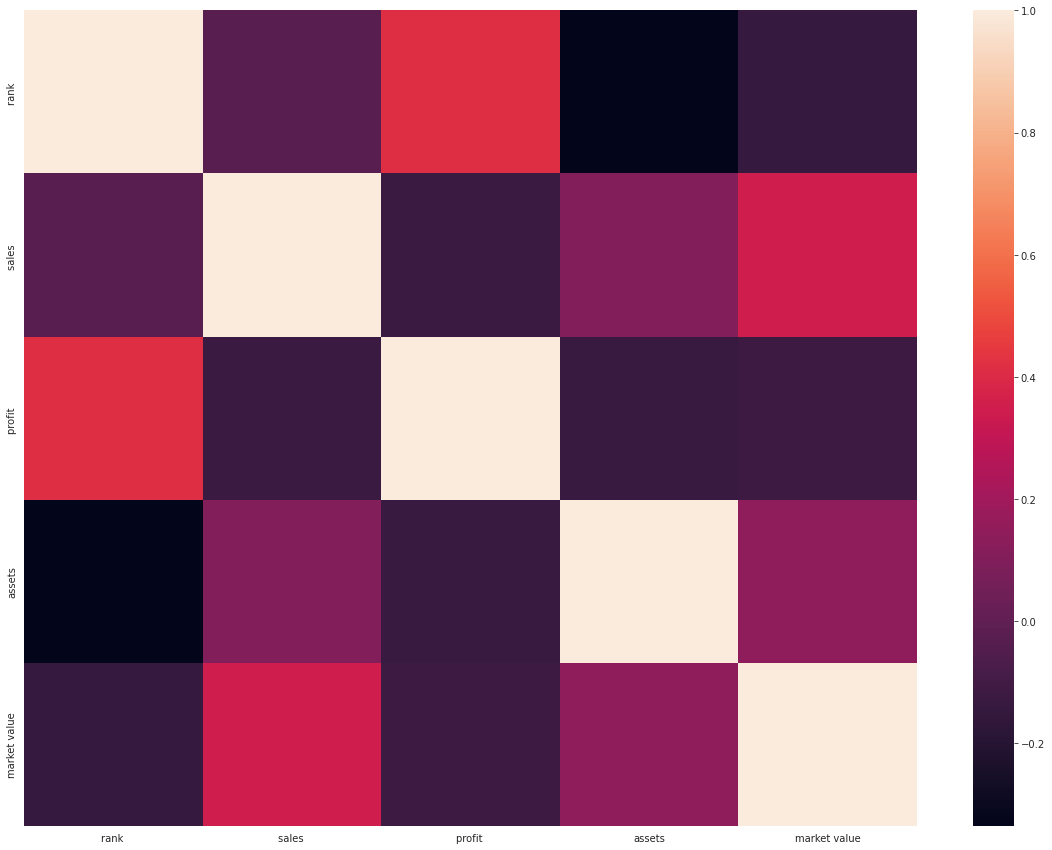

In [18]:
plt.figure(figsize = (20, 15))
sns.heatmap(dataset.corr())
plt.show()

#### Profit effect the rank most, and some correlation exist between market value and sales.

<Figure size 1440x1080 with 0 Axes>

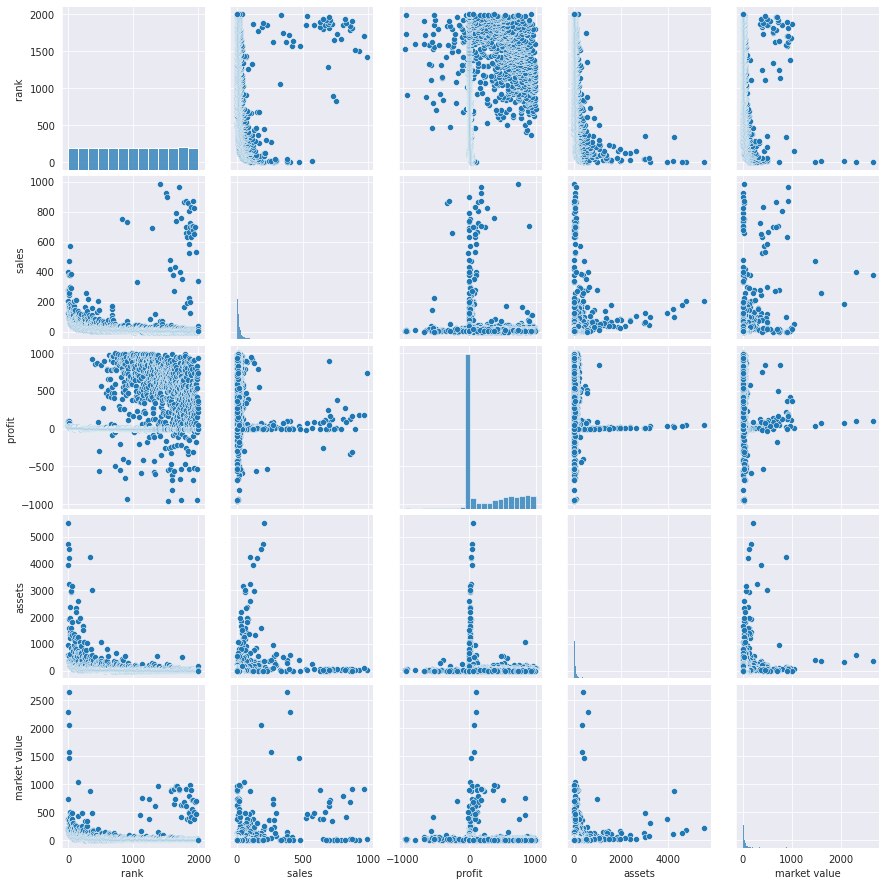

In [19]:
plt.figure(figsize = (20, 15))
sns.pairplot(dataset)
plt.show()

In [20]:
def show_outlier(col: pd.Series) -> None:
    q1 = dataset[col].quantile(0.25)
    q3 = dataset[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outliers = dataset[(dataset[col] > upper) | (dataset[col] < lower)]
    print(outliers.head())
    print(f"Number of outlier: {len(outliers)}")
    print()

In [21]:
for col in cols:
    show_outlier(col)

   rank                             global company        country  sales   \
0      1                        Berkshire Hathaway  United States  276.09   
1      2                                      ICBC          China  208.13   
2      3  Saudi Arabian Oil Company (Saudi Aramco)   Saudi Arabia  400.38   
3      4                            JPMorgan Chase  United States  124.54   
4      5                   China Construction Bank          China  202.07   

   profit    assets  market value  
0    89.80   958.78        741.48  
1    54.03  5518.51        214.43  
2   105.36   576.04       2292.08  
3    42.12  3954.69        374.45  
4    46.89  4746.95        181.32  
Number of outlier: 239

      rank                              global company        country  sales   \
901     902                      Central Japan Railway          Japan    8.25   
1528   1529                            Las Vegas Sands  United States    4.23   
1596   1597  Korea Shipbuilding & Offshore Engineering

## EDA Conclusion
1. Most of the company are from USA, China, and Japan.
2. The sales, assets, and market value shared the similar distribution.
3. Most of the company have 0 profits.
4. Outlier exist in the dataset.